# Assignment - Support Vector Machines-2

#### Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms??.

#### Answer:

In machine learning algorithms, especially in Support Vector Machines (SVMs), the relationship between polynomial functions and kernel functions is significant. A polynomial kernel is a specific type of kernel function used to transform input data into a higher-dimensional space, allowing the algorithm to capture non-linear relationships between features. Here's an explanation of the relationship:

### 1. **Polynomial Functions:**
   - A polynomial function is a mathematical function consisting of terms that are powers of a variable multiplied by coefficients.
   - In machine learning, polynomial functions are often used to introduce non-linearities into models. For example, in polynomial regression, the relationship between input features and the target variable is modeled using polynomial terms.

### 2. **Kernel Functions:**
   - In the context of machine learning, a kernel function is a technique to implicitly map input data into a higher-dimensional space without explicitly computing the transformation.
   - Kernel functions are crucial for algorithms like Support Vector Machines (SVMs), where they allow the model to operate in a higher-dimensional space to capture complex, non-linear patterns.

### 3. **Polynomial Kernel:**
   - A polynomial kernel is a specific type of kernel function used in SVMs to introduce polynomial terms into the decision function.
   - The polynomial kernel function has the form \(K(x, x') = (x \cdot x' + c)^d\), where \(x\) and \(x'\) are input feature vectors, \(c\) is a constant, and \(d\) is the degree of the polynomial.

### 4. **Relationship:**
   - Polynomial functions and polynomial kernels share a common goal: introducing non-linear relationships into the model.
   - The polynomial kernel achieves this by implicitly applying polynomial transformations to the input data without explicitly calculating the transformed feature vectors.
   - The SVM decision function, with a polynomial kernel, operates as if the data has been lifted into a higher-dimensional space, enabling the model to capture complex decision boundaries.

### 5. **Practical Implications:**
   - The choice of the degree \(d\) in the polynomial kernel is a hyperparameter that determines the complexity of the decision boundaries. Higher degrees can capture more intricate patterns but may also lead to overfitting.
   - In practice, the polynomial kernel is valuable when the relationship between features is expected to have polynomial characteristics.

In summary, the relationship between polynomial functions and kernel functions lies in their shared objective of introducing non-linearities into machine learning models. The polynomial kernel, as a specific type of kernel function, enables SVMs to capture non-linear patterns in the data by implicitly applying polynomial transformations.

#### Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?.

#### Answer:

To implement an SVM with a polynomial kernel in Python using Scikit-learn, you can use the SVC (Support Vector Classification) class and specify the kernel parameter as 'poly'

Accuracy: 0.8333333333333334


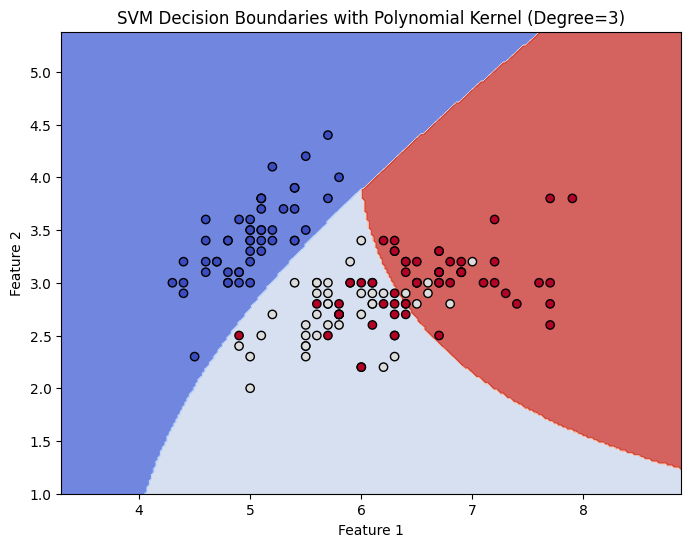

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset (or any other dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Select only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the SVM classifier with a polynomial kernel
degree = 3  # Degree of the polynomial kernel
svm_poly = SVC(kernel='poly', degree=degree)

# Train the SVM classifier
svm_poly.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_poly.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot decision boundaries
plt.figure(figsize=(8, 6))

h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title(f"SVM Decision Boundaries with Polynomial Kernel (Degree={degree})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


#### Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

#### Answer:

In Support Vector Regression (SVR), the parameter epsilon (\(\varepsilon\)) is a critical hyperparameter that determines the width of the margin around the regression line within which no penalty is incurred. The impact of increasing the value of epsilon on the number of support vectors depends on the nature of the data and the model complexity. Here are some general observations:

1. **Wider Margin (Larger Epsilon):**
   - When you increase the value of epsilon, you are essentially allowing a wider margin around the regression line.
   - A wider margin implies that more data points can fall within the margin without incurring a penalty.

2. **Increased Number of Support Vectors:**
   - With a wider margin, the SVR model becomes more tolerant of deviations from the regression line.
   - As a result, more data points may fall within the margin, and some of these points may become support vectors.

3. **Smoothing Effect:**
   - Larger epsilon values tend to smooth the regression curve. The model focuses less on fitting individual data points exactly and more on capturing the overall trend.

4. **Impact on Model Complexity:**
   - A larger epsilon can lead to a simpler model with fewer support vectors, especially if the underlying data has noise or outliers.
   - However, it also depends on the overall complexity of the data and the desired flexibility of the model.

5. **Risk of Underfitting:**
   - While a larger epsilon can help the model generalize better, excessively large values might lead to underfitting, where the model becomes too simple and fails to capture important patterns in the data.

It's essential to strike a balance when choosing the value of epsilon. Cross-validation and grid search techniques can be employed to find the optimal value for epsilon that results in a good trade-off between fitting the data and generalizing well to new, unseen data.

In summary, increasing the value of epsilon in SVR generally tends to increase the number of support vectors, but the extent of this increase depends on the data characteristics and the desired model complexity.m.

#### Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?e?

#### Answer:

Certainly! The performance of Support Vector Regression (SVR) is highly influenced by several key parameters. Let's briefly discuss each parameter and its impact on SVR performance:

1. **Kernel Function:**
   - **Role:** Determines the type of transformation applied to the input data to capture non-linear patterns.
   - **Choices:**
      - Linear Kernel: Suitable for linear relationships.
      - Polynomial Kernel: Useful for capturing polynomial relationships. Requires tuning of the degree parameter.
      - Radial Basis Function (RBF) or Gaussian Kernel: Effective for non-linear and complex patterns. Requires tuning of the gamma parameter.

   - **Example:**
     - Use a linear kernel for simple linear relationships.
     - Choose an RBF kernel for complex and non-linear relationships.

2. **C Parameter:**
   - **Role:** Controls the trade-off between achieving a smooth fit and fitting the training data precisely. It is the regularization parameter.
   - **Effect:**
      - Smaller C values lead to a smoother fit, allowing more errors within the epsilon tube.
      - Larger C values result in a more rigid fit, penalizing errors within the epsilon tube.

   - **Example:**
     - Increase C if you suspect the model is underfitting.
     - Decrease C if you want a smoother fit and are willing to tolerate more errors.

3. **Epsilon (ϵ) Parameter:**
   - **Role:** Defines the width of the epsilon-insensitive tube, the region where errors are not penalized.
   - **Effect:**
      - Larger epsilon allows a wider tube, making the model more tolerant to errors.
      - Smaller epsilon tightens the tube, making the model less tolerant to errors.

   - **Example:**
     - Increase epsilon for a more robust model when dealing with noisy data.
     - Decrease epsilon for a more precise fit when the data is less noisy.

4. **Gamma Parameter:**
   - **Role:** Affects the influence of individual training samples. It determines the reach of the kernel function.
   - **Effect:**
      - Smaller gamma values lead to a broader reach, considering more points in the calculation.
      - Larger gamma values result in a narrower reach, focusing on closer points.

   - **Example:**
     - Increase gamma when you want the model to consider only nearby points.
     - Decrease gamma when you want the model to consider a broader set of points.

In short:
   - **Kernel Choice:** Choose based on the data's underlying patterns (linear, polynomial, or non-linear).
   - **C Parameter:** Adjust for the trade-off between model flexibility and fitting to the training data.
   - **Epsilon Parameter:** Tune to control the width of the tube and the model's tolerance to errors.
   - **Gamma Parameter:** Adjust to influence the reach and influence of individual data points in the kernel calculation.

Optimal parameter values are often found through techniques like grid search and cross-validation. It's crucial to strike a balance between fitting the training data well and generalizing to new, unseen data. make the SVM robust to outliers.

#### Q5. Assignment:
- Import the necessary libraries and load the dataseg
- Split the dataset into training and testing sets
- Preprocess the data using any technique of your choice (e.g. scaling, Normalization)
- Create an instance of the SVC classifier and train it on the training data
- Use the trained classifier to predict the labels of the testing data
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score
- Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCv to improve its performance.
- Train the tuned classifier on the entire dataset
- Save the trained classifier to a file for future use.

#### Answer:

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc_classifier = SVC()

# Train the classifier on the training data
svc_classifier.fit(X_train_scaled, y_train)

# Use the trained classifier to predict the labels of the testing data
y_pred = svc_classifier.predict(X_test_scaled)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Tune hyperparameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the tuned classifier on the entire dataset
tuned_svc_classifier = SVC(**best_params)
tuned_svc_classifier.fit(X, y)

# Save the trained classifier to a file for future use
joblib.dump(tuned_svc_classifier, 'tuned_svc_classifier.joblib')


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


['tuned_svc_classifier.joblib']